In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
#File to load
crime_data_path = "crime_data.csv"

#Read crime_data and store into Pandas dataframe
crime_data = pd.read_csv(crime_data_path)
crime_data.head()

,Sac County City,Crimes,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Sacramento,Property Crimes,"21,001","20,200","18,563","19,967","17,980","15,078","16,501","15,283","14,683","15,417"
1,Sacramento,Burglary,"5,135","5,027","4,141","4,474","3,886","3,238","3,713","3,070","2,888","2,751"
2,Sacramento,Forcible Entry,"3,499","3,431","2,764","3,006","2,684","2,123","2,516","2,000","1,951","1,845"
3,Sacramento,No Force,"1,636","1,596","1,377","1,468","1,202","1,115","1,197","1,070",937,906
4,Sacramento,Residence,"3,918","3,750","2,958","3,185","2,908","2,236","2,523","2,017","1,830","1,679"


In [3]:
# Locate only 'Property Crimes'
pc_df = crime_data.loc[crime_data['Crimes'] == 'Property Crimes']
pc_df.head(7)

,Sac County City,Crimes,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Sacramento,Property Crimes,"21,001","20,200","18,563","19,967","17,980","15,078","16,501","15,283","14,683","15,417"
12,Citrus Heights,Property Crimes,"3,627","3,931","3,333","3,117","2,653","2,691","2,586","2,676","2,782","2,478"
24,Elk Grove,Property Crimes,"3,443","3,204","3,270","3,292","2,963","3,072","3,120","2,342","2,245","2,359"
36,Folsom,Property Crimes,"1,504","1,484","1,510","1,277","1,336","1,305","1,185","1,384","1,229","1,245"
48,Galt,Property Crimes,632,467,421,470,517,574,606,579,595,462
60,Isleton,Property Crimes,9,8,16,23,46,23,26,13,6,24
72,Rancho Cordova,Property Crimes,"1,928","2,293","1,904","2,107","2,202","1,644","1,726","1,435","1,410","1,388"


In [4]:
# Drop 'Crimes'
pc_total = pc_df.drop(['Crimes'], axis = 1) 
pc_total.head(7)

,Sac County City,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Sacramento,"21,001","20,200","18,563","19,967","17,980","15,078","16,501","15,283","14,683","15,417"
12,Citrus Heights,"3,627","3,931","3,333","3,117","2,653","2,691","2,586","2,676","2,782","2,478"
24,Elk Grove,"3,443","3,204","3,270","3,292","2,963","3,072","3,120","2,342","2,245","2,359"
36,Folsom,"1,504","1,484","1,510","1,277","1,336","1,305","1,185","1,384","1,229","1,245"
48,Galt,632,467,421,470,517,574,606,579,595,462
60,Isleton,9,8,16,23,46,23,26,13,6,24
72,Rancho Cordova,"1,928","2,293","1,904","2,107","2,202","1,644","1,726","1,435","1,410","1,388"


In [5]:
pc_row = pc_total.melt(id_vars=["Sac County City"], 
        var_name="Date", 
        value_name="Value")
pc_row.head(20)

,Sac County City,Date,Value
0,Sacramento,2009,"21,001"
1,Citrus Heights,2009,"3,627"
2,Elk Grove,2009,"3,443"
3,Folsom,2009,"1,504"
4,Galt,2009,632
5,Isleton,2009,9
6,Rancho Cordova,2009,"1,928"
7,Sacramento,2010,"20,200"
8,Citrus Heights,2010,"3,931"
9,Elk Grove,2010,"3,204"


In [6]:
# Collect the mean crime rates for sac county
average_crime = pc_total.mean()

# Collect the years where data was collected
years = average_crime.keys()


KeyError: 'Sacramento'

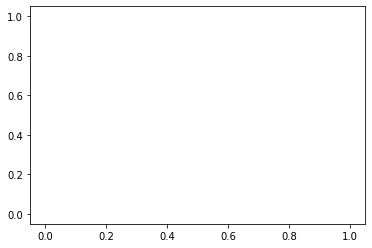

In [7]:
# Plot the sac county average as a line chart
county_avg = plt.plot(years, average_crime, color="blue", label="Sac County Average" )

# Plot the crime values for Sacramento
one_sacramento = plt.plot(years, pc_total.loc['Sacramento',"2009":"2018"], 
                        color="green",label=pc_total.loc['Sacramento',"Sac County City"])

# Create a legend for our chart loc="best"
plt.legend(handles=[world_avg, one_sacramento], loc="best")

# Show the chart
plt.show()

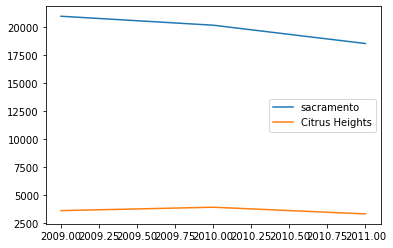

In [8]:
pc_df = pd.DataFrame({
    'sacramento': [21001,20200,18563],
    'Citrus Heights': [3627,3931,3333]
    }, index=[2009, 2010, 2011])
lines = pc_df.plot.line()

In [10]:
#File to load population
#pop_data_path = "population_data.xlsx"

#Read crime_data and store into Pandas dataframe
#pop_data = pd.read_excel(pop_data_path)
#pop_data.head()